<a href="https://colab.research.google.com/github/SubhajoyMukherjee/Data-Preprocessing-Tool-For-Audible-Dataset/blob/main/Data_Cleaning_with_outlier_Removal_and_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Description of the Dataset

In [21]:
df=pd.read_csv('/content/audible_uncleaned.csv')   #Import the dataset

In [22]:
df.head(6)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [24]:
df.describe()

,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,16-05-18,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533


In [25]:
print(df.dtypes)

name           object
author         object
narrator       object
time           object
releasedate    object
language       object
stars          object
price          object
dtype: object


In [26]:
print(df.isnull().sum())

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64


In [27]:
print(df.duplicated().sum())

0


In [28]:
x=df['language'].value_counts()
y=df['language'].unique()
print(type(x))
print(x)
print(y)


<class 'pandas.core.series.Series'>
language
English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
korean                  4
slovene                 4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: count, dtype:

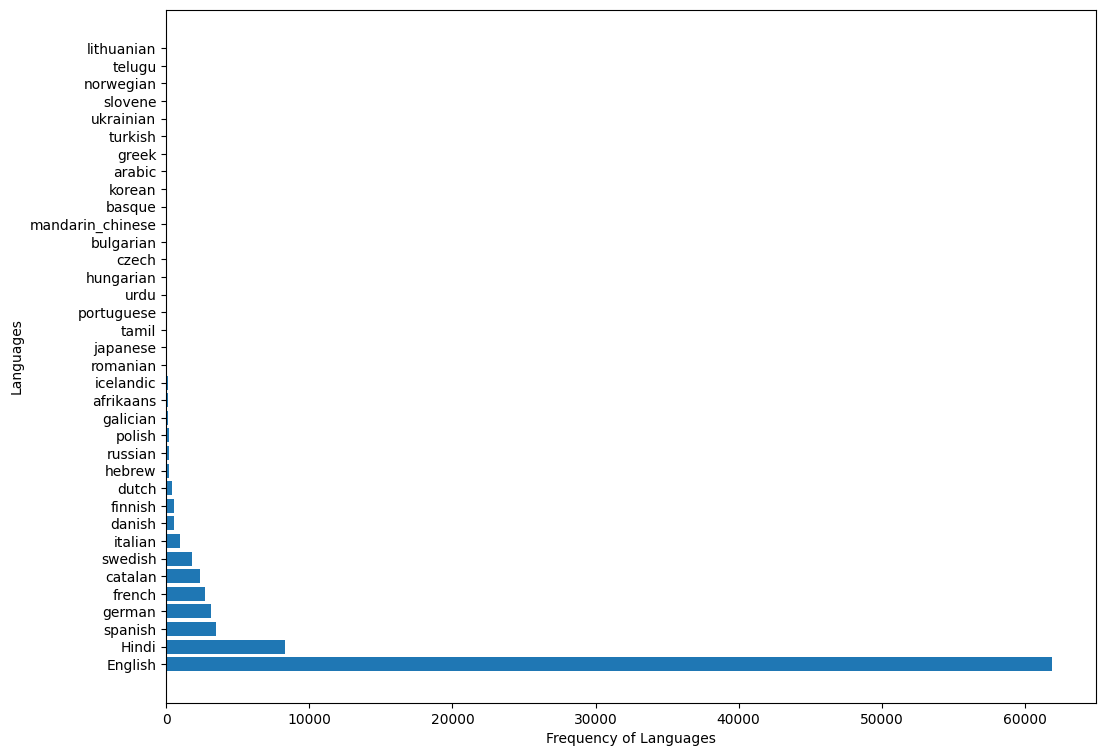

In [29]:
plt.figure(figsize=(12,9))
plt.barh(y,x)
plt.xlabel("Frequency of Languages")
plt.ylabel("Languages")
plt.show()

In [30]:
print(df['stars'][0])
st=df['stars'][0]
#print(st[0])
print(st[0],st[9],st[-10],st[-9])
stp=[]
stp=df['stars']
print(stp)
print(type(stp))

5 out of 5 stars34 ratings
5 5 3 4
0           5 out of 5 stars34 ratings
1         4.5 out of 5 stars41 ratings
2         4.5 out of 5 stars38 ratings
3         4.5 out of 5 stars12 ratings
4        4.5 out of 5 stars181 ratings
                     ...              
87484                    Not rated yet
87485                    Not rated yet
87486                    Not rated yet
87487                    Not rated yet
87488                    Not rated yet
Name: stars, Length: 87489, dtype: object
<class 'pandas.core.series.Series'>


In [31]:
'''plt.figure(figsize=(9,80))
plt.barh(df['price'].unique(),df['price'].value_counts())
plt.ylabel('Price of the Audiobook')
plt.xlabel('Frequency of the Price')
plt.show()'''

"plt.figure(figsize=(9,80))\nplt.barh(df['price'].unique(),df['price'].value_counts())\nplt.ylabel('Price of the Audiobook')\nplt.xlabel('Frequency of the Price')\nplt.show()"

# Outlier Detection and Removal
### We will do the outlier detection columnwise
We start from 'price' column as its values can easily be converted into float and we can use IQR("Inter Quartile Range") values to detect the outliers

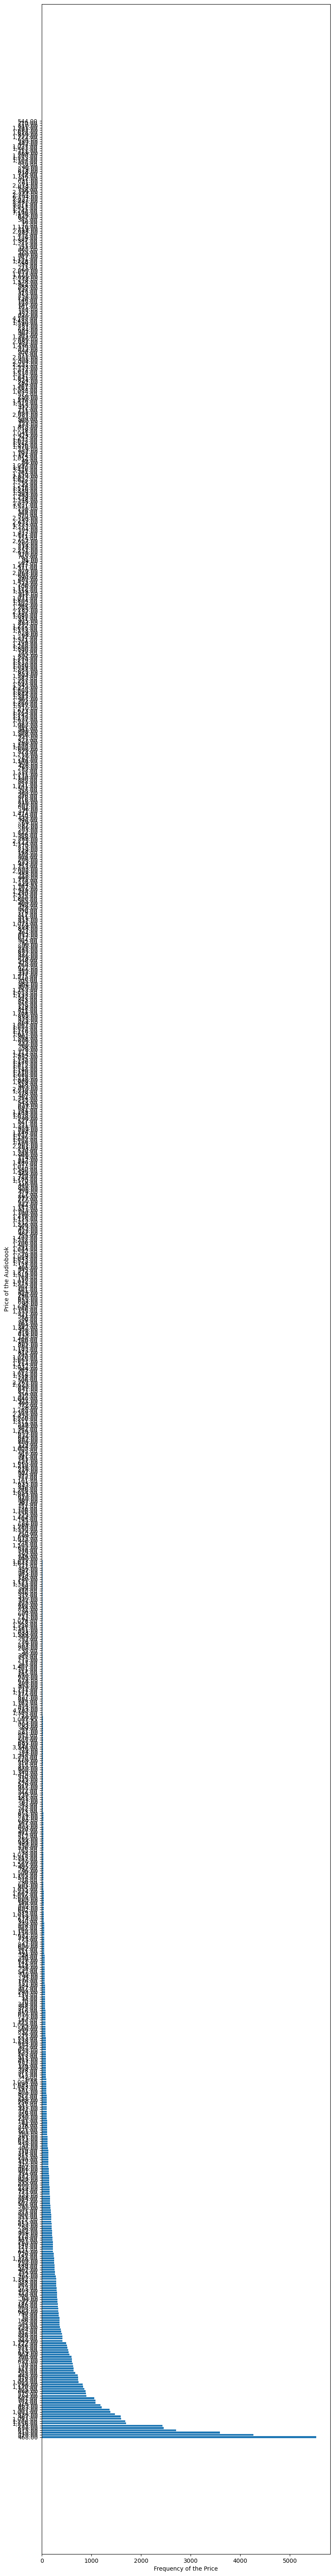

In [32]:
#'price' data visualization using plots
plt.figure(figsize=(9,80))
plt.barh(df['price'].unique(),df['price'].value_counts())
plt.ylabel('Price of the Audiobook')
plt.xlabel('Frequency of the Price')
plt.show() # 'price' data visualization using


In [33]:
#Unique Values with frequencies in 'price' data

print(df['price'].sort_values().unique())

['1,002.00' '1,003.00' '1,004.00' ... '998.00' '999.00' 'Free']


As the 'price' data has comma and string 'Free' in some rows so we first have to replace them with '' and '0' respectively

Then convert all data in 'price' column from string to float as IQR method can only be applied to integer anf float data

In [34]:
df['price']=df['price'].str.replace('Free','0')   #'Free' string replace with '0'
df['price']=df['price'].str.replace(',','')       #',' inside numerical values are replaced by ''
df['price']=df['price'].astype(float)             #All the data in 'price' is converted into float

First of all the 25 percentile and 75 percentile data is found by applying 'quantile()' function

In [35]:
percentile25=df['price'].quantile(0.25)    #25 percentile
percentile75=df['price'].quantile(0.75)     #75 percentile
print("It is the 25 percentile value in 'price' dataset :",df['price'].quantile(0.25))    #Print the 25 percentile value
print("It is the 75 percentile value in 'price' dataset :",df['price'].quantile(0.75))     #Print the 75 percentile value
iqr=percentile75-percentile25     #Calculate the Inter quartile Range
upperlimit=percentile75+1.5*iqr   #Make the Upper Threshold Range
print("It is the Upper threshold value :",upperlimit)     #Print the Upper Threshold Range

lowerlimit=percentile25-1.5*iqr                           #Make the Lower Threshold Range
print("It is the Lower threshold value :",lowerlimit)     #Print the Upper Threshold Range


It is the 25 percentile value in 'price' dataset : 268.0
It is the 75 percentile value in 'price' dataset : 755.0
It is the Upper threshold value : 1485.5
It is the Lower threshold value : -462.5


In [36]:
#Removing the outlier on the basis of Upper threshold Value and Lower Threshold Value
print(df[df['price']>upperlimit].count())
print(df[df['price']<lowerlimit].count())
new_df=df[df['price']<upperlimit]
new_df=new_df[new_df['price']>lowerlimit]
new_df.info()  # It is the new datase whose 'price' column has no outlier values

name           704
author         704
narrator       704
time           704
releasedate    704
language       704
stars          704
price          704
dtype: int64
name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 86785 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         86785 non-null  object 
 1   author       86785 non-null  object 
 2   narrator     86785 non-null  object 
 3   time         86785 non-null  object 
 4   releasedate  86785 non-null  object 
 5   language     86785 non-null  object 
 6   stars        86785 non-null  object 
 7   price        86785 non-null  float64
dtypes: float64(1), object(7)
memory usage: 6.0+ MB


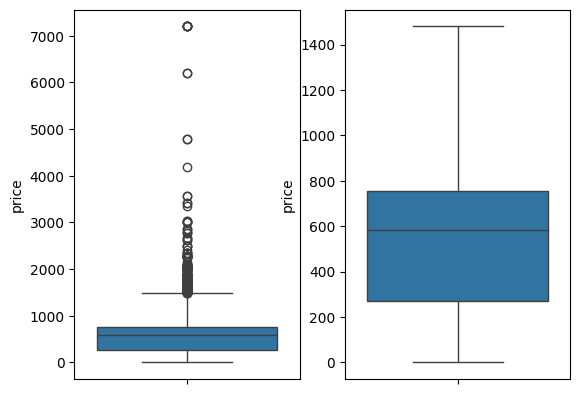

In [37]:
#Box Plot of 'price' datas with and without outliers
plt.subplot(1,2,1)
sns.boxplot(df['price'])

plt.subplot(1,2,2)
sns.boxplot(new_df['price'])
plt.show()

### Next we will focus on 'stars' column for outlier detection and removal as it has 2nd lowest unique values

First we will see the unique values with their frequencies

In [38]:
#Print unique values with their frequencies

print(new_df['stars'].value_counts())

stars
Not rated yet                    71968
5 out of 5 stars1 rating          3688
4 out of 5 stars1 rating          1240
5 out of 5 stars2 ratings          982
4.5 out of 5 stars2 ratings        649
                                 ...  
4.5 out of 5 stars558 ratings        1
5 out of 5 stars926 ratings          1
4 out of 5 stars171 ratings          1
5 out of 5 stars92 ratings           1
4 out of 5 stars76 ratings           1
Name: count, Length: 656, dtype: int64


As out of 87489 total datas in 'stars' in 72417 rows it has 'No rating information' we will drop the column

In [39]:
new_df.drop(['stars'],axis=1,inplace=True)    #Drop the Whole 'stars' column
new_df.info()                                 #Get the no of rows and columns information the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 86785 entries, 0 to 87488
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         86785 non-null  object 
 1   author       86785 non-null  object 
 2   narrator     86785 non-null  object 
 3   time         86785 non-null  object 
 4   releasedate  86785 non-null  object 
 5   language     86785 non-null  object 
 6   price        86785 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.3+ MB


### Now we will detect outlier in 'time' column as it has 3rd less no. of unique values. Also its values can easily be converted to the floats. As a result we can use IQR Method for outlier Detection

1. First of all we will see unique values frequency in the 'time' column
2. Then we will convert the values in the 'time' column to only minutes and datatype as float

In [40]:
#The no. of unique values in 'time' column data with their frequencies

print(new_df['time'].value_counts())

time
2 mins                372
6 mins                369
5 mins                369
7 mins                356
4 mins                347
                     ... 
27 hrs and 17 mins      1
29 hrs and 44 mins      1
31 hrs and 35 mins      1
30 hrs and 11 mins      1
36 hrs and 47 mins      1
Name: count, Length: 2171, dtype: int64


In [41]:
#Apply some string operation in the 'time' dataset

new_df['time']=new_df['time'].str.replace('hrs',',')    #Replace the 'hrs' substring with comma
new_df['time']=new_df['time'].str.replace('and','')     #Remove the 'and' substring
new_df['time']=new_df['time'].str.replace('mins','')    #Remove the 'mins' substring
new_df['time']=new_df['time'].str.split(' ')            #Store the 'time' data values in form of list by spliting the string from spaces with the help of spilt() function

print(new_df['time'][0])                    #Print one value of the 'time' dataset to see the data format after the string operations
print(len(new_df['time'][0]))               #Print the length of each data of the 'time' column


['2', ',', '', '20', '']
5


### Covert the values of the 'time' column to minutes and make it datatype as float, as we can easily use the IQR Method to detect and remove the outliers in from this column

In [42]:
#Covert the 'time' column data in float and minutes
ser=pd.Series()         #Initialize a Panda Series Variable
for index, row in new_df.iterrows():
    if(len(row['time'])==5):
        if((row['time'][1]==',') & (row['time'][4]=='')):
            a=float(row['time'][0])
            b=float(row['time'][3])
            ser[index]=a*60+b
    elif(len(row['time'])==2):
        if(row['time'][1]==','):
            a=float(row['time'][0])
            ser[index]=a*60
        elif(row['time'][1]==''):
            a=float(row['time'][0])
            ser[index]=a

In [43]:
ser.head(4)                               #Print first 4 data in the minutes and float type
new_df['time']=ser                        #Store the floating type minutes data in the dataframe
print(new_df['time'].isnull().sum())      #Print no. of NaN values in the 'time' column
new_df.dropna(inplace=True)               #Drop the NaN data from the whole Dataframe
print(new_df['time'].isnull().sum())      #Print the NaN values in the 'time' column after using dropna() function

8229
0


### Now We will apply the IQR Method on the 'time' column

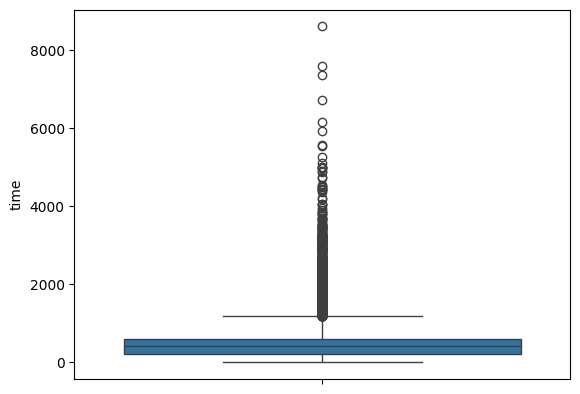

In [44]:
#Now use the boxplot for 'time' column data

sns.boxplot(new_df['time'])
plt.show()


In [45]:
percentile25=new_df['time'].quantile(0.25)    #25 percentile
percentile75=new_df['time'].quantile(0.75)     #75 percentile
print("It is the 25 percentile value in 'time' dataset :",new_df['time'].quantile(0.25))    #Print the 25 percentile value
print("It is the 75 percentile value in 'time' dataset :",new_df['time'].quantile(0.75))     #Print the 75 percentile value
iqr=percentile75-percentile25     #Calculate the Inter quartile Range
upperlimit=percentile75+1.5*iqr   #Make the Upper Threshold Range
print("It is the Upper threshold value :",upperlimit)     #Print the Upper Threshold Range

lowerlimit=percentile25-1.5*iqr                           #Make the Lower Threshold Range
print("It is the Lower threshold value :",lowerlimit)     #Print the Upper Threshold Range

It is the 25 percentile value in 'time' dataset : 203.0
It is the 75 percentile value in 'time' dataset : 599.0
It is the Upper threshold value : 1193.0
It is the Lower threshold value : -391.0


In [46]:
#Removing the outlier on the basis of Upper threshold Value and Lower Threshold Value
print(new_df[new_df['time']>upperlimit].count())
print(new_df[new_df['time']<lowerlimit].count())
new_df1=new_df[new_df['time']<upperlimit]
new_df1=new_df1[new_df1['price']>lowerlimit]
new_df1.info()  # It is the new datase whose 'time' column has no outlier values

name           2053
author         2053
narrator       2053
time           2053
releasedate    2053
language       2053
price          2053
dtype: int64
name           0
author         0
narrator       0
time           0
releasedate    0
language       0
price          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 76498 entries, 0 to 87487
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         76498 non-null  object 
 1   author       76498 non-null  object 
 2   narrator     76498 non-null  object 
 3   time         76498 non-null  float64
 4   releasedate  76498 non-null  object 
 5   language     76498 non-null  object 
 6   price        76498 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.7+ MB


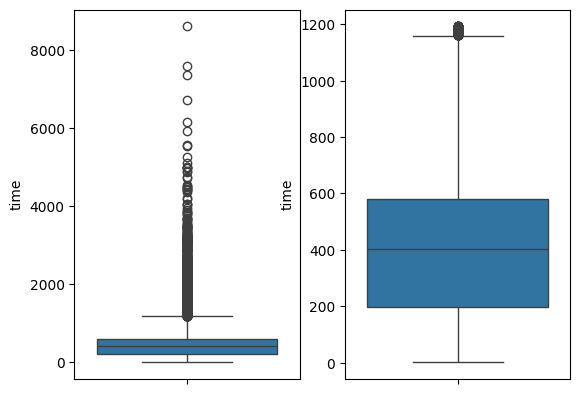

In [47]:
#Box Plot of 'time' datas with and without outliers
plt.subplot(1,2,1)
sns.boxplot(new_df['time'])
plt.subplot(1,2,2)
sns.boxplot(new_df1['time'])
plt.show()

### Now we will detect and remove outliers from the 'releasedata' column data
As it can easily converted to numerical values and also from here we can easily identify wrong dates

In [48]:
#Print unique values 'releasedate' column with their frequencies
print(new_df1['releasedate'].value_counts())


releasedate
16-05-18    751
04-01-22    435
01-02-22    371
08-02-22    331
15-03-22    327
           ... 
26-12-10      1
15-04-04      1
16-08-07      1
09-01-22      1
08-04-04      1
Name: count, Length: 4949, dtype: int64


### we will do some string operation to store the data in 'relesedate' in form of list

In [49]:
new_df1['releasedate']=new_df1['releasedate'].str.split('-')        #Store the 'releasedate' data values in form of list by spliting the string from '-' with the help of spilt() function
print(new_df1['releasedate'][0])                               #Print one value of the 'releasedate' dataset to see the data format after the string operations
print(len(new_df1['releasedate'][0]))                          #Print the length of each data of the 'relesedate' column

['04', '08', '08']
3


### Now we will convert all string values in the 'relesedate' into float values and also remove the dates in 2025 year and dates before 2001 year

In [ ]:
ser=pd.Series()                             #Initialize a Pandas Series type variable
ser=new_df1['releasedate']                  #Copy all the data from dataframe to the ser variable
print(len(ser))                             #Print no. of data in the ser variable
for index, row in new_df1.iterrows():
    a=float(row['releasedate'][-1])
    b=float(row['releasedate'][0])
    c=float(row['releasedate'][1])
    if(a>24):
        ser[index]='NaN'
    if(a<1):
        ser[index]='NaN'
    if(b>31):
        ser[index]='NaN'
    if(c>12):
        ser[index]='NaN'


new_df1['releasedate']=ser                        #Copy the ser variable data to the new_df1 dataframe's 'releasedate' column
print(len(new_df1['releasedate']))                #Print the no. of elements in the new_df1 dataframe's 'releasedate' column
print(new_df1['releasedate'].isnull().sum())      #Print no. of null values in the new_df1 dataframe's 'releasedate' column

In [51]:
ser1=pd.Series()
ser2=pd.Series()
for index,row in new_df1.iterrows():
  ser1[index]=row['releasedate'][1]
  ser2[index]=row['releasedate'][-1]




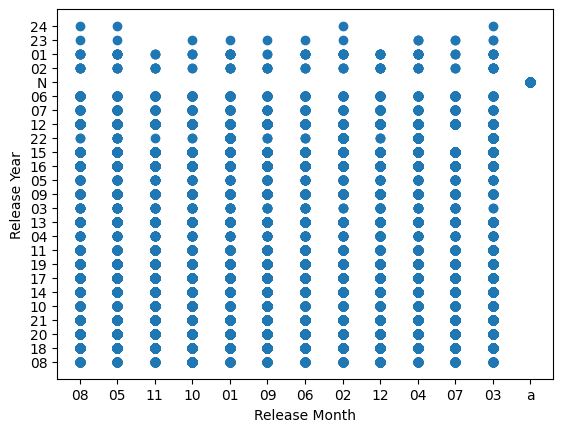

In [52]:
plt.scatter(ser1,ser2)
plt.xlabel("Release Month")
plt.ylabel("Release Year")
plt.show()

# Now we will do data cleaning in 'author' column
1. In the 'author' column the "Writtenby:" substring is to be removed
2. Also in the 'author' column there should be space in between FirstName and LastName of authors

In [53]:
#Removing "Writtenby:" substring
new_df1['author'].str.replace("Writtenby:","")

0        GeronimoStilton
1            RickRiordan
2             JeffKinney
3            RickRiordan
4            RickRiordan
              ...       
87483    RogerW.Thompson
87484       ChrisStewart
87485      StephenO'Shea
87486          MarkTwain
87487     LaurenceSterne
Name: author, Length: 76498, dtype: object

In [54]:
#Entering space in between the FirstName and the LastName of authors


# OverView of the Cleaned Data

In [55]:
new_df1.head(10)

,name,author,narrator,time,releasedate,language,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,140.0,"[04, 08, 08]",English,468.0
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788.0,"[01, 05, 18]",English,820.0
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,123.0,"[06, 11, 20]",English,410.0
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676.0,"[05, 10, 21]",English,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,600.0,"[13, 01, 10]",English,820.0
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,635.0,"[30, 10, 18]",English,656.0
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,143.0,"[25, 11, 14]",English,233.0
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,752.0,"[02, 05, 17]",English,820.0
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,656.0,"[02, 05, 17]",English,1256.0
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,802.0,"[24, 09, 19]",English,820.0


In [56]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76498 entries, 0 to 87487
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         76498 non-null  object 
 1   author       76498 non-null  object 
 2   narrator     76498 non-null  object 
 3   time         76498 non-null  float64
 4   releasedate  76498 non-null  object 
 5   language     76498 non-null  object 
 6   price        76498 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.7+ MB


In [57]:
new_df1.describe()

,time,price
count,76498.000000,76498.000000
mean,405.768922,560.161885
std,266.096904,304.664521
min,2.000000,0.000000
25%,197.000000,305.000000
50%,405.000000,586.000000
75%,582.000000,755.000000
max,1192.000000,1480.000000


# As the in the 'releasedate' column have no outlier values so the cleaned dataset is copied to a "audible_cleaned.csv" File

In [58]:
new_df1.to_csv("audible_cleaned.csv")